<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Diplomado_Ciencia_de_Datos/blob/main/metodos_supervisados/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Author: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align='center'> Ejercicios prácticos de regresión lineal </h1>

Los datos de la vivienda de California (California Housing) corresponden a unos. datos de juguete sobre algunas viviendas en un vecindario de California. Este conjunto de datos se utiliza bastante para practicar sobre modelos de aprendizaje supervisado y estadística espacial. Aquí el ejercicio principal consiste en ser capaz de predecir o explicar el valor de la vivienda.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<AxesSubplot: >

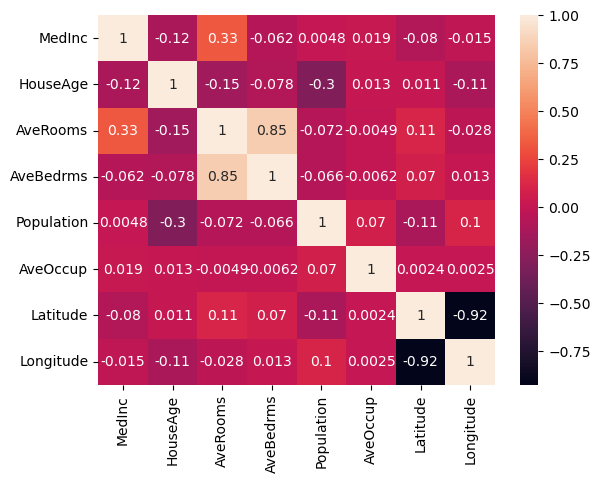

In [3]:
import seaborn as sns

corr_matrix  = housing_df.corr()

sns.heatmap(corr_matrix, annot=True)

<AxesSubplot: >

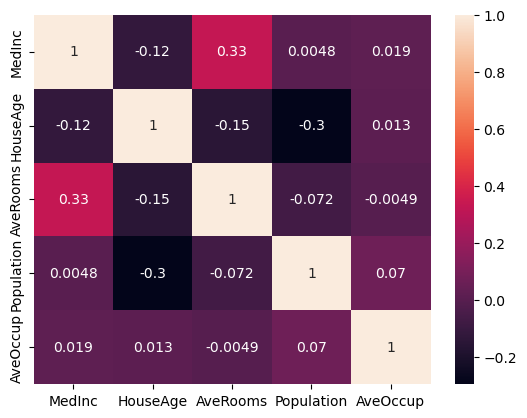

In [5]:
housing_df_drop = housing_df.drop(["AveBedrms", "Latitude", "Longitude"], axis=1)

corr_matrix_drop  = housing_df_drop.corr()

sns.heatmap(corr_matrix_drop, annot=True)

En algunos ejercicios de aprendizaje supervisado, resulta una buena idea reescalar las variables que van a entrar como insumo al modelo. En particular, existen dos maneras bastante utilizadas para hacer esto:

- Reescalador MinMax:

$$MinMax(\mathbf{x}) = \left[\frac{\mathbf{x} - min(\mathbf{x})}{max(\mathbf{x}) - min(\mathbf{x})} \right]$$

- Reescalador estandarizado:

$$Standard(\mathbf{x}) = \frac{\mathbf{x} - \bar{x}}{s_{x}}$$

donde $\mathbf{\bar{x}}$ y $s_{x}$ son la media y la desviación estandar muestral de $\mathbf{x}$.

Este ejercicio se hace típicamente porque los algoritmos de optimización que utilizan los computadores a veces convergen más rápido cuándo todas las variables se encuentran en una escala en común.

El por qué se utiliza un reescalador u otro depende de la naturaleza de los datos, las características de la máquina de aprendizaje que va a utilizarse y el problema en cuestión.

Para el ejercicio de a continuación, utilizaremos la función `MinMaxScaler()` de `Sklearn`. Para aprender más sobre las herramientas de preprocesamiento disponibles en esta librería, puede visitar https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(housing_df_drop, 
                                                    housing.target, 
                                                    test_size=0.3, 
                                                    random_state=13)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.231990,0.542569,0.030525,0.040054,0.001952
std,0.131238,0.246838,0.018698,0.032364,0.009963
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.141812,0.333333,0.023517,0.022087,0.001399
50%,0.208625,0.549020,0.029085,0.032766,0.001712
75%,0.292605,0.705882,0.034893,0.048659,0.002082
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_scaled, y_train)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_train = reg.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print(mse_train)
print(mae_train)

0.6461669167335481
0.5979131971083576


In [9]:
y_pred = reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(mse)
print(mae)

0.6481302283555613
0.6015497091820177
